Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Achkasov Egor"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        res = 0
        for i in range(len(self.xk)):
            l = 1
            for j in range(len(self.xk)):
                if j == i:
                    continue
                temp = (self.xk[i] - self.xk[j])
                if (temp != 0):
                    l *= (x - self.xk[j]) / temp
                else:
                    l = 666
            res += self.yk[i] * l
        return res
        

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


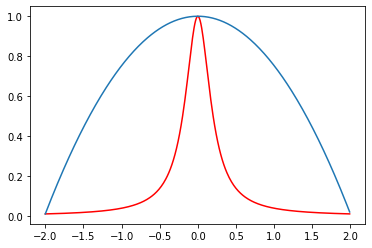

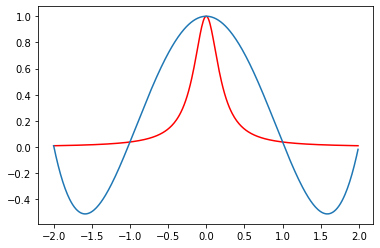

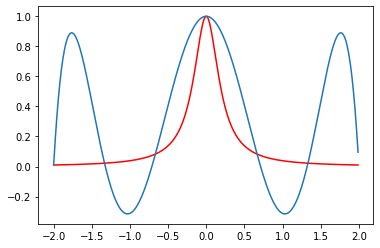

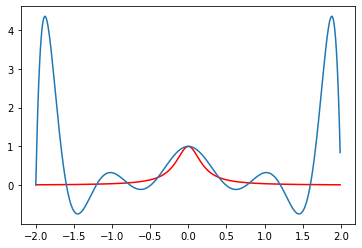

In [4]:
# YOUR CODE AND COMMENTS HERE (5 pts, manually graded)
from matplotlib import pyplot as plt

f = lambda x: 1/(1 + 25*x**2)
ms = [3, 5, 7, 11]
for m in ms:
    xs = np.linspace(-2, 2, m)
    ys = f(xs)
    lagr = LagrangeInterpolator(xs, ys)

    x = np.arange(-2.0, 2.0, 0.01)
    plt.plot(x, f(x), 'r')
    plt.plot(x, lagr(x))
    plt.show()

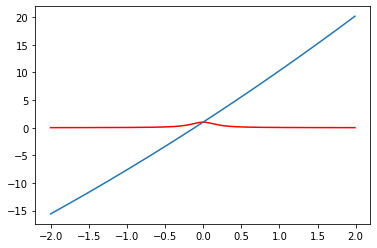

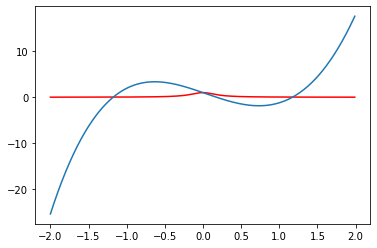

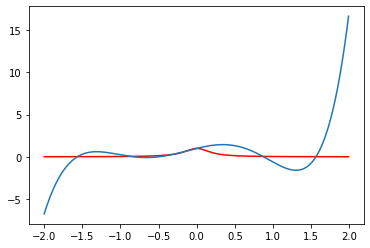

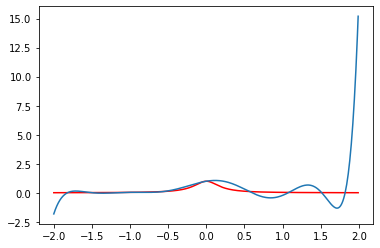

In [5]:
# Узлы Чебышева
from math import cos

for m in ms:
    xs = []
    for k in range(m):
        xs.append(2 * cos(((2*k-1)*np.pi)/(2*m)))
    xs = np.array(xs)
    ys = f(xs)
    lagr = LagrangeInterpolator(xs, ys)
    
    x = np.arange(-2.0, 2.0, 0.01)
    plt.plot(x, f(x), 'r')
    plt.plot(x, lagr(x))
    plt.show()